In [21]:
import pandas as pd

df = pd.read_excel('data/PreciosOF.xlsx')
print(df)


      Unnamed: 0      Fecha  Compra   Venta
0              0 2023-01-16  180.47  189.47
1              1 2023-01-13  179.53  188.53
2              2 2023-01-12  179.26  188.26
3              3 2023-01-11  179.21  188.21
4              4 2023-01-10  179.11  188.11
...          ...        ...     ...     ...
3209        3209 2010-01-08    3.79    3.83
3210        3210 2010-01-07    3.79    3.83
3211        3211 2010-01-06    3.79    3.83
3212        3212 2010-01-05    3.78    3.82
3213        3213 2010-01-04    3.78    3.82

[3214 rows x 4 columns]


In [22]:
df = pd.DataFrame(df)
df

,Unnamed: 0,Fecha,Compra,Venta
0,0,2023-01-16,180.47,189.47
1,1,2023-01-13,179.53,188.53
2,2,2023-01-12,179.26,188.26
3,3,2023-01-11,179.21,188.21
4,4,2023-01-10,179.11,188.11
...,...,...,...,...
3209,3209,2010-01-08,3.79,3.83
3210,3210,2010-01-07,3.79,3.83
3211,3211,2010-01-06,3.79,3.83
3212,3212,2010-01-05,3.78,3.82


In [23]:
df.head()

,Unnamed: 0,Fecha,Compra,Venta
0,0,2023-01-16,180.47,189.47
1,1,2023-01-13,179.53,188.53
2,2,2023-01-12,179.26,188.26
3,3,2023-01-11,179.21,188.21
4,4,2023-01-10,179.11,188.11


In [24]:
df.index # it is an attribute, not function

RangeIndex(start=0, stop=3214, step=1)

In [25]:
df.drop(df.index[0], inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns={0: 'Fecha', 1: 'Compra', 2: 'Venta'}, inplace=True)
df

,Fecha,Compra,Venta
1,2023-01-13,179.53,188.53
2,2023-01-12,179.26,188.26
3,2023-01-11,179.21,188.21
4,2023-01-10,179.11,188.11
5,2023-01-09,178.72,187.72
...,...,...,...
3209,2010-01-08,3.79,3.83
3210,2010-01-07,3.79,3.83
3211,2010-01-06,3.79,3.83
3212,2010-01-05,3.78,3.82


In [26]:
df.describe()

,Compra,Venta
count,3213.000000,3213.000000
mean,34.677756,36.527961
std,41.040294,43.520789
min,3.780000,3.820000
25%,5.120000,5.170000
50%,14.860000,15.260000
75%,57.910000,62.940000
max,179.530000,188.530000


In [27]:
df['Compra'] = pd.to_numeric(df['Compra'])
df['Venta'] = pd.to_numeric(df['Venta'])

In [28]:
df.to_pickle('data/pkl/PreciosOF.xlsx.pkl')

In [29]:
df.set_index('Fecha', inplace=True)
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

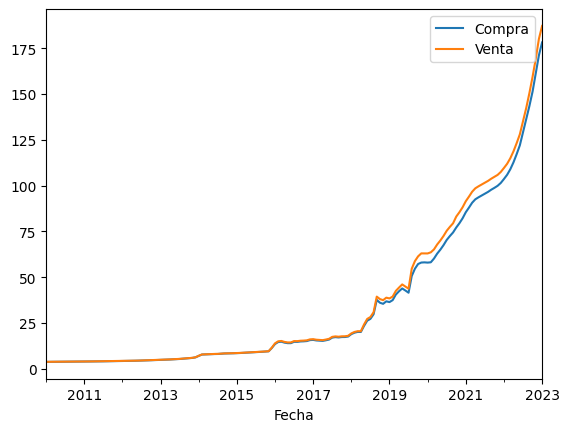

In [30]:
df.resample(rule='M').mean().plot(); # Historico

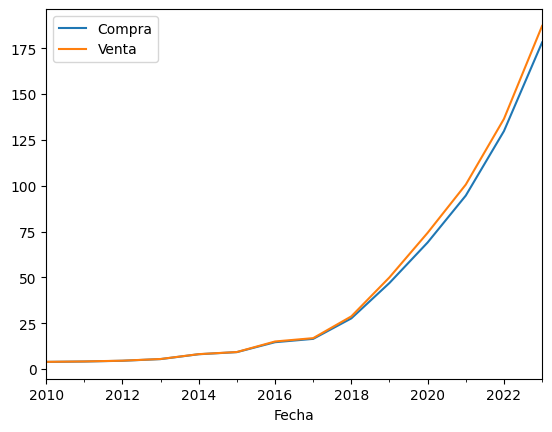

In [31]:
df.resample(rule='AS').mean().plot(); # AS Primer año

[Text(0.5, 1.0, 'Promedio valor Dolar')]

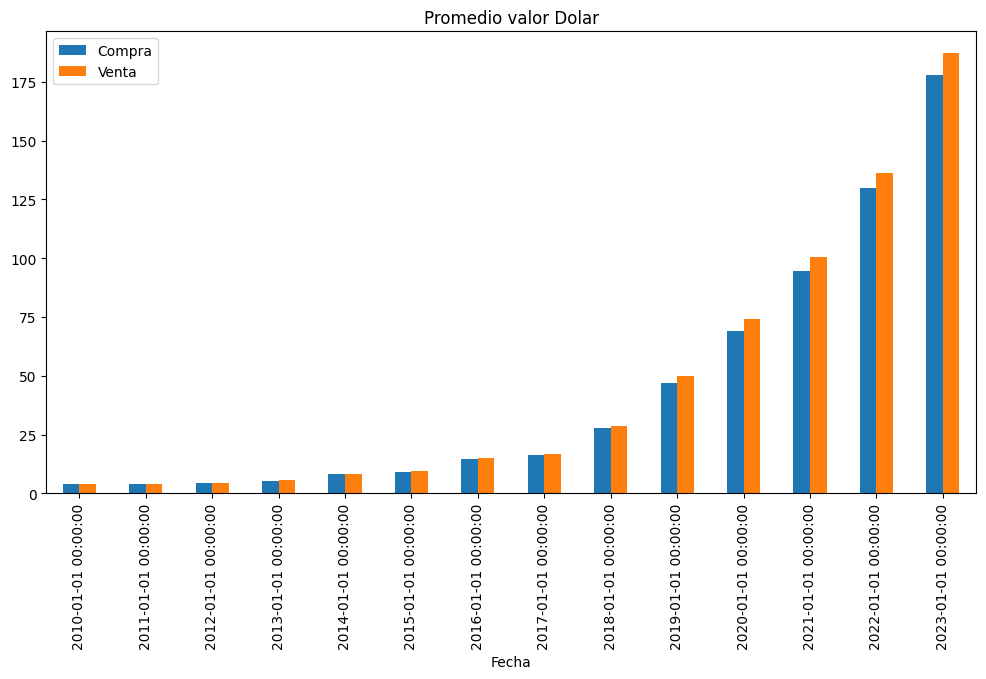

In [32]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Promedio valor Dolar')

<AxesSubplot:xlabel='Fecha'>

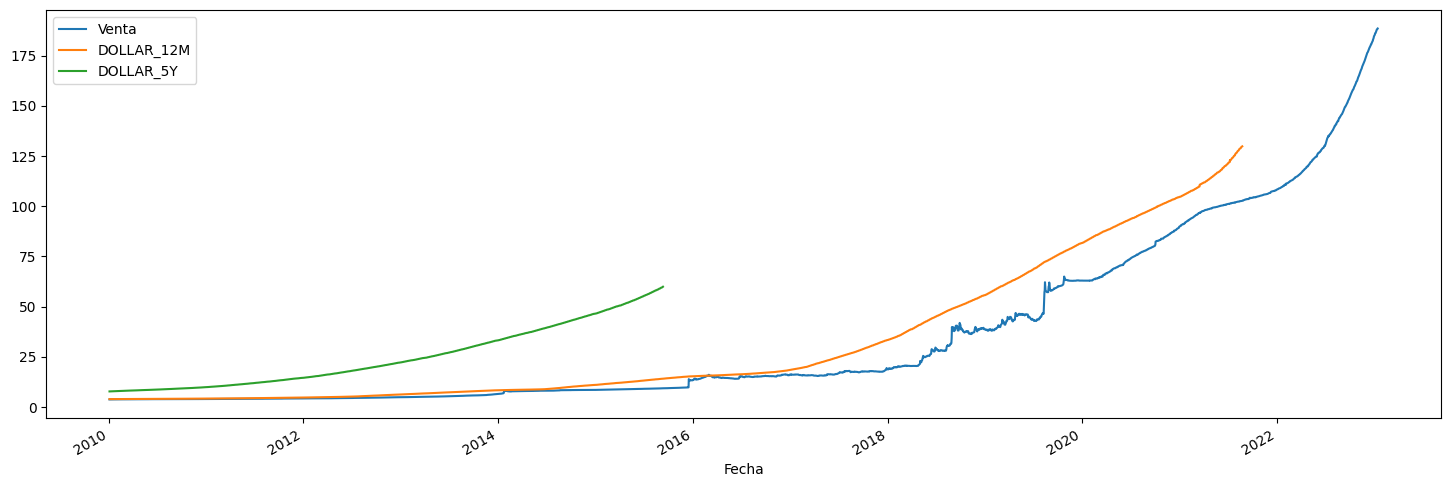

In [33]:
df['DOLLAR_12M'] = df['Venta'].rolling(window=365).mean()
df['DOLLAR_5Y'] = df['Venta'].rolling(window=365*5+1).mean()
df[['Venta','DOLLAR_12M','DOLLAR_5Y']].plot(figsize=(18,6))

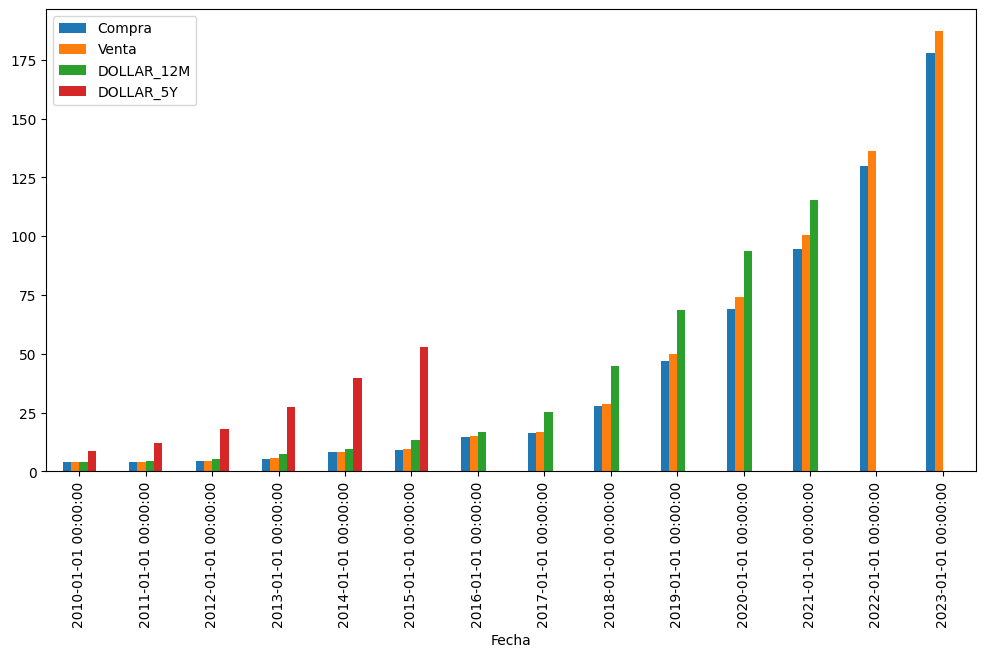

In [34]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))

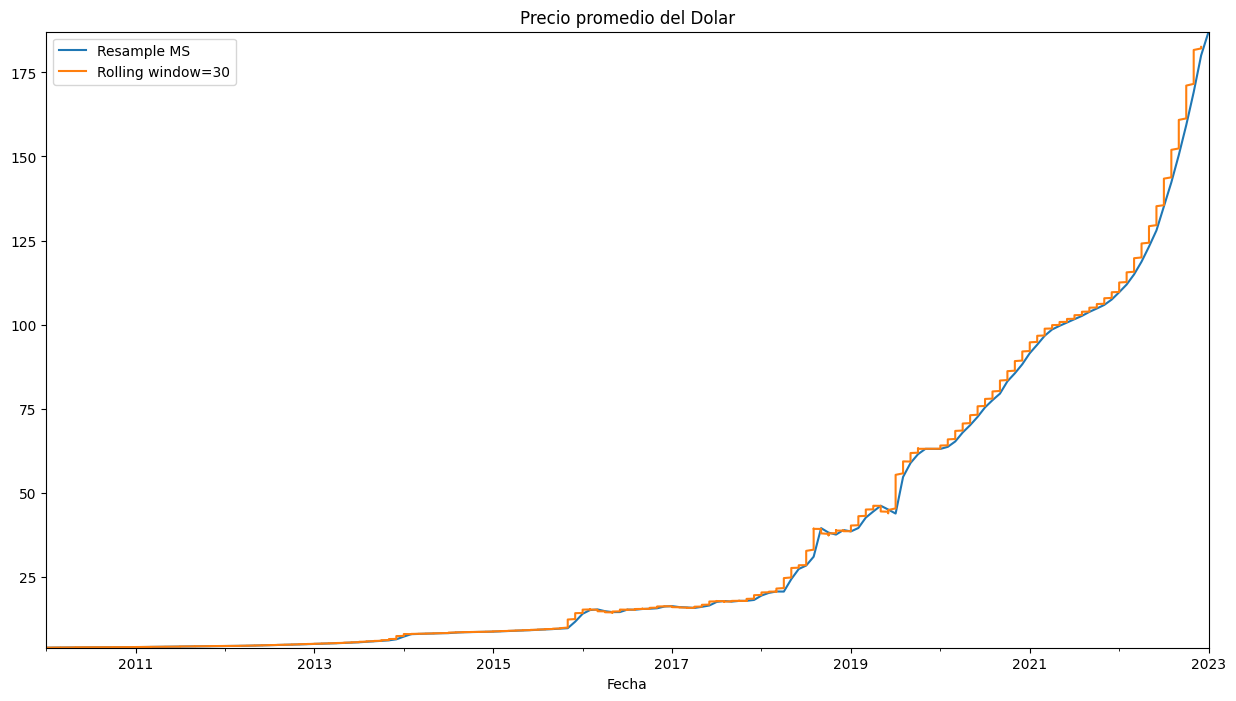

In [35]:
ax = df['Venta'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS') # monthly resampled mean
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(label='Rolling window=30') # monthly rolling windows/moving average
ax.set(title='Precio promedio del Dolar')
ax.legend()

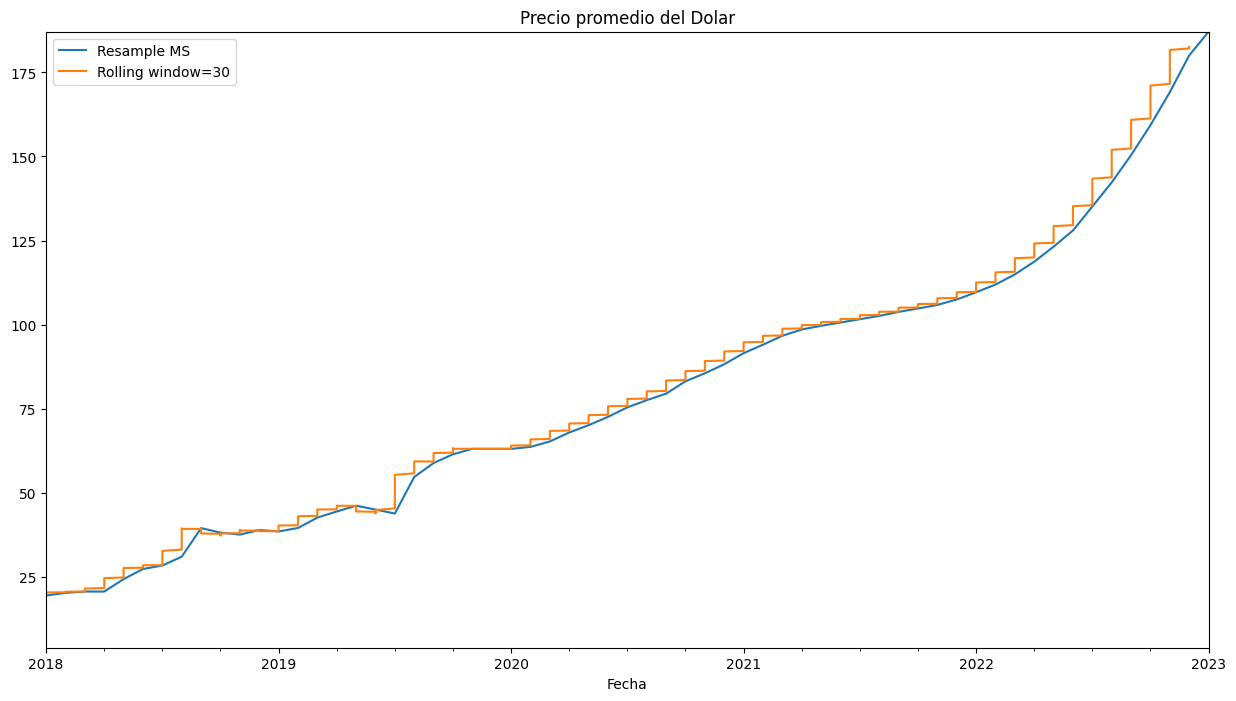

In [36]:
from datetime import datetime

ax = df['Venta'].resample(rule='M').mean().plot(xlim=['2018-01-01', datetime.now()], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(xlim=['2018-01-01',datetime.now()],label='Rolling window=30')
ax.set(title='Precio promedio del Dolar')
ax.legend()


<AxesSubplot:xlabel='Fecha'>

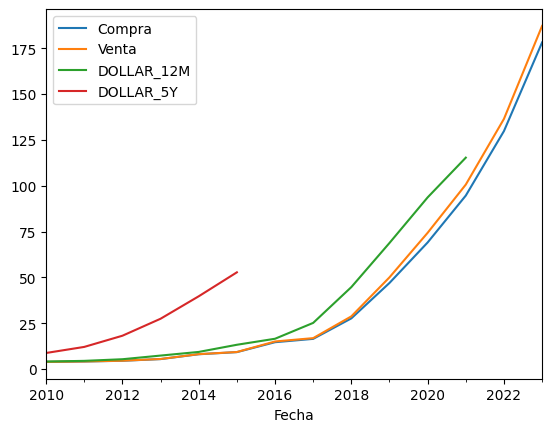

In [37]:
df.resample(rule='1y').mean().plot() #1y = 1 years

<AxesSubplot:xlabel='Fecha'>

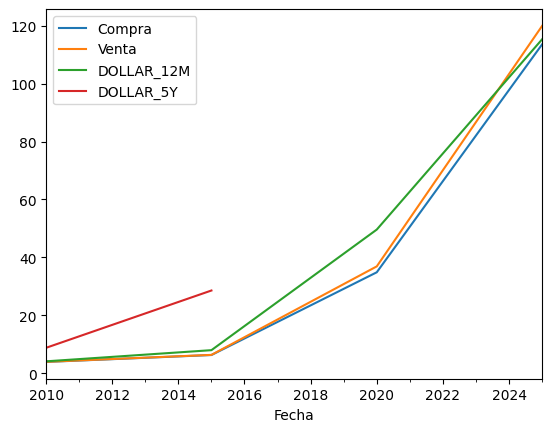

In [38]:
df.resample(rule='5y').mean().plot() #5y = 5 years

<AxesSubplot:xlabel='Fecha'>

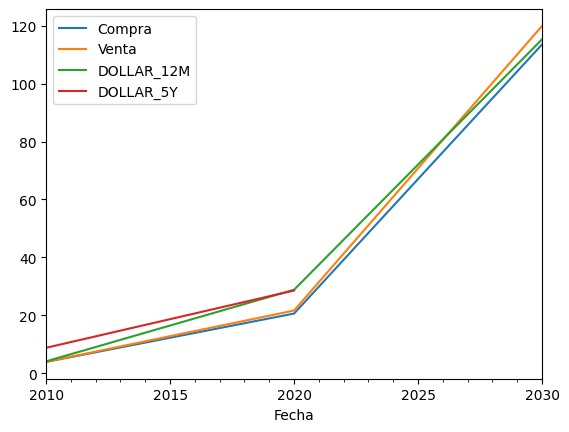

In [39]:
df.resample(rule='10y').mean().plot()

<AxesSubplot:xlabel='Fecha'>

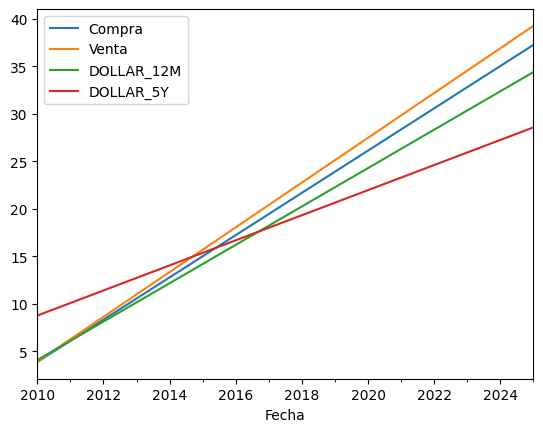

In [40]:
df.resample(rule='15y').mean().plot()